# Random Forest Regressors

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd 
import sys, os
import matplotlib.pyplot as plt

# Add the project root to sys.path (one level up from this notebook)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from hypotai.data import generate_triangle_data
from hypotai.plotting import plot_triangle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

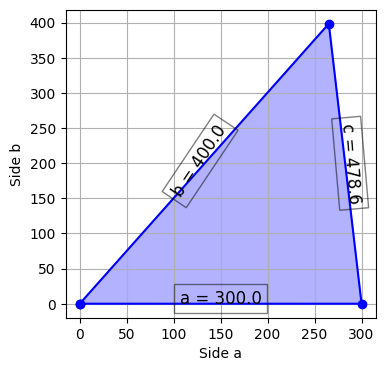

In [3]:
plot_triangle(300, 400, 85)

In [10]:
df = generate_triangle_data(n_samples=30_000, angle_mode="random")
X = df[["a", "b", "angle_deg"]]
y = df["c"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Regressor
forest = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow fully
    min_samples_leaf=1,    # fine control for overfitting
    random_state=42,
    n_jobs=-1,              # use all CPU cores
    oob_score=True,          # enable out-of-bag score
)

forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [11]:
y_pred = forest.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.975125138801934
R²: 0.9992936761392607


So when 100 individual trees learn from randomly sampled data and the results are averaged it performs very well.<br>
If we look at the feature importances, we also see that while all have similar values, the degree is more important than the sides and the sides have almost the same weight. What an amazing intuition we gained from the data!

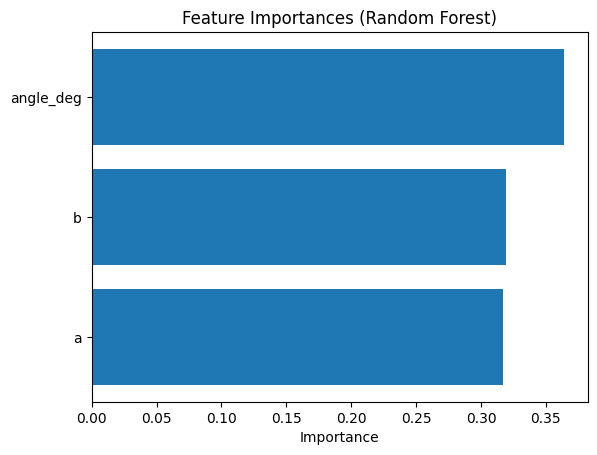

In [8]:
importances = forest.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.grid(False)
plt.show()

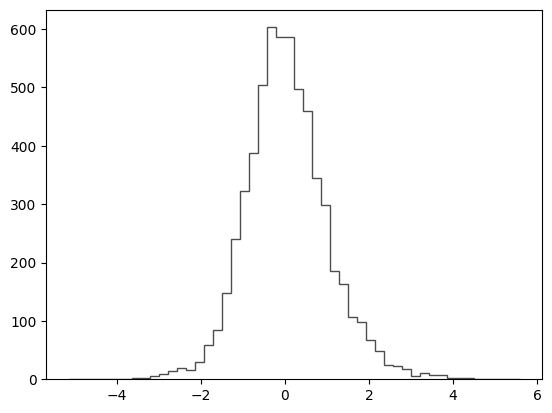

In [9]:
plt.hist(y_test - y_pred, bins=50, edgecolor='black', histtype='step', alpha=0.7);

Random Forests can estimate validation performance automatically using the “left-out” data, this is called "Out of bag error".

Think of it this way, for each tree, we bootstrap (randomly sample with replacement) and train it with a subset, what we didn't use is called out of bag. So for each tree we have a set that the training hasn't seen, so we can validate using that data. And at the end average over all.

In [12]:
## We also have the oob score
print("OOB Score:", forest.oob_score_)  

OOB Score: 0.9992363657191585
